In [380]:

import xml.etree.ElementTree as ET
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.integrate import quad

In [381]:
tree = ET.parse('D:\\SMC Optimization\\SMC_Mock_Sim\\press_disp.xml') #Directory of the XML file
root = tree.getroot()

In [382]:
data = []

for time_block, dept_block in zip(root.findall('.//Block//IndpVar'), root.findall('.//Block')):
    # Get the time value
    time_value = time_block.attrib.get('Value')
    
    # Get the ddisplamcement value
    dept_value = dept_block.find('DeptValues').text.strip()
    
    # Append both values as a tuple (time_value, dept_value) to data
    data.append((time_value, dept_value))

print(data)


[('0.019225', '2.3070e-05'), ('0.096639', '1.1597e-04'), ('0.145082', '1.7410e-04'), ('0.194347', '2.3322e-04'), ('0.241131', '2.8936e-04'), ('0.289876', '3.4785e-04'), ('0.340109', '4.0813e-04'), ('0.392858', '4.7143e-04'), ('0.435886', '5.2306e-04'), ('0.478791', '5.7455e-04'), ('0.525826', '6.3099e-04'), ('0.572625', '6.8715e-04'), ('0.617171', '7.4061e-04'), ('0.661218', '7.9346e-04'), ('0.705152', '8.4618e-04'), ('0.748688', '8.9843e-04'), ('0.791542', '9.4985e-04'), ('0.832465', '9.9896e-04'), ('0.872909', '1.0475e-03'), ('0.910442', '1.0925e-03'), ('0.948494', '1.1382e-03'), ('0.985058', '1.1821e-03'), ('1.041443', '1.2497e-03'), ('1.061941', '1.2703e-03'), ('1.067080', '1.2703e-03'), ('1.087130', '1.2700e-03'), ('1.093630', '1.2699e-03'), ('1.097130', '1.2699e-03'), ('1.098130', '1.2698e-03'), ('1.100130', '1.2698e-03'), ('1.104130', '1.2697e-03'), ('1.112130', '1.2696e-03'), ('1.128130', '1.2694e-03'), ('1.160130', '1.2689e-03'), ('1.224130', '1.2679e-03'), ('1.352130', '1.265

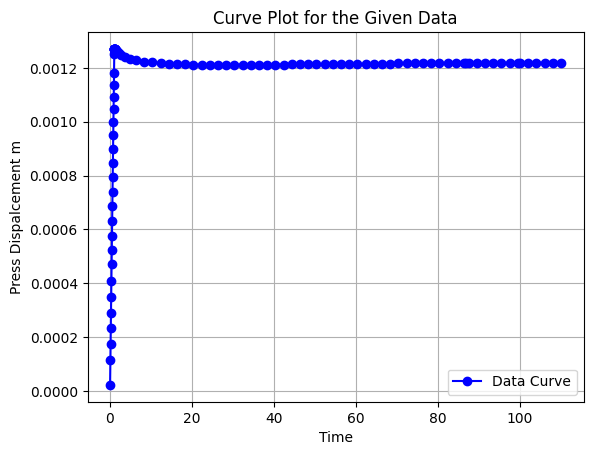

In [383]:
data_array = np.array([(float(x), float(y)) for x, y in data])

# Separate the array into x and y components
x_values = data_array[:, 0]  # First column for x-axis values
y_values = data_array[:, 1]  # Second column for y-axis values

# Plot the curve
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data Curve')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Press Dispalcement m')
plt.title('Curve Plot for the Given Data')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Data extract

Experiment data

In [384]:
tree = ET.parse('D:\\SMC Optimization\\SMC_Mock_Sim\\Mock_Simulation\\press_displacement_real.xml') #Directory of the XML file
root = tree.getroot()

In [385]:
real_data = []

for time_block, dept_block in zip(root.findall('.//Block//IndpVar'), root.findall('.//Block')):
    # Get the time value
    time_value = time_block.attrib.get('Value')
    
    # Get the ddisplamcement value
    dept_value = dept_block.find('DeptValues').text.strip()
    
    # Append both values as a tuple (time_value, dept_value) to data
    real_data.append((time_value, dept_value))

print(real_data)

[('0.019225', '3.8450e-05'), ('0.065506', '1.3101e-04'), ('0.097162', '1.9432e-04'), ('0.130807', '2.6161e-04'), ('0.162031', '3.2406e-04'), ('0.191341', '3.8268e-04'), ('0.223249', '4.4650e-04'), ('0.246377', '4.9275e-04'), ('0.279443', '5.5889e-04'), ('0.305365', '6.1073e-04'), ('0.332563', '6.6513e-04'), ('0.359858', '7.1972e-04'), ('0.386464', '7.7293e-04'), ('0.412673', '8.2535e-04'), ('0.437917', '8.7583e-04'), ('0.463016', '9.2603e-04'), ('0.487727', '9.7545e-04'), ('0.511834', '1.0237e-03'), ('0.535177', '1.0704e-03'), ('0.558773', '1.1175e-03'), ('0.581768', '1.1635e-03'), ('0.615800', '1.2316e-03'), ('0.640579', '1.2800e-03'), ('0.652013', '1.2801e-03'), ('0.672375', '1.2798e-03'), ('0.678875', '1.2797e-03'), ('0.682375', '1.2797e-03'), ('0.683375', '1.2797e-03'), ('0.685375', '1.2797e-03'), ('0.689375', '1.2796e-03'), ('0.697375', '1.2795e-03'), ('0.713375', '1.2793e-03'), ('0.745375', '1.2788e-03'), ('0.809375', '1.2777e-03'), ('0.937375', '1.2753e-03'), ('1.193375', '1.270

In [386]:
real_data_array = np.array([(float(x), float(y)) for x, y in real_data])

# Separate the array into x and y components
real_time = real_data_array[:, 0]  # First column for x-axis values
real_disp = real_data_array[:, 1]  # Second column for y-axis values

Guess 1

In [387]:
tree_1 = ET.parse('D:\\SMC Optimization\\SMC_Mock_Sim\\Mock_Simulation\\press_displacement_g1.xml') #Directory of the XML file
root_1 = tree_1.getroot()

guess1_data = []

for time_block, dept_block in zip(root_1.findall('.//Block//IndpVar'), root_1.findall('.//Block')):
    # Get the time value
    time_value = time_block.attrib.get('Value')
    
    # Get the ddisplamcement value
    dept_value = dept_block.find('DeptValues').text.strip()
    
    # Append both values as a tuple (time_value, dept_value) to data
    guess1_data.append((time_value, dept_value))

print(guess1_data)

guess1_data_array = np.array([(float(x), float(y)) for x, y in guess1_data])

# Separate the array into x and y components
guess1_time = guess1_data_array[:, 0]  # First column for x-axis values
guess1_disp = guess1_data_array[:, 1]  # Second column for y-axis values


[('0.019225', '3.8450e-05'), ('0.065506', '1.3101e-04'), ('0.097117', '1.9423e-04'), ('0.130734', '2.6147e-04'), ('0.162117', '3.2423e-04'), ('0.188273', '3.7655e-04'), ('0.223292', '4.4658e-04'), ('0.252383', '5.0477e-04'), ('0.279694', '5.5939e-04'), ('0.307671', '6.1534e-04'), ('0.332852', '6.6570e-04'), ('0.359450', '7.1890e-04'), ('0.386104', '7.7221e-04'), ('0.411691', '8.2338e-04'), ('0.437619', '8.7524e-04'), ('0.462512', '9.2502e-04'), ('0.487657', '9.7531e-04'), ('0.511595', '1.0232e-03'), ('0.534513', '1.0690e-03'), ('0.557536', '1.1151e-03'), ('0.580786', '1.1616e-03'), ('0.614839', '1.2297e-03'), ('0.640243', '1.2782e-03'), ('0.652602', '1.2783e-03'), ('0.675628', '1.2780e-03'), ('0.682128', '1.2780e-03'), ('0.685628', '1.2779e-03'), ('0.686628', '1.2779e-03'), ('0.688628', '1.2779e-03'), ('0.692628', '1.2779e-03'), ('0.700628', '1.2778e-03'), ('0.716628', '1.2775e-03'), ('0.748628', '1.2771e-03'), ('0.812628', '1.2760e-03'), ('0.940628', '1.2737e-03'), ('1.196628', '1.269

Guess 2

In [388]:
tree_2 = ET.parse('D:\\SMC Optimization\\SMC_Mock_Sim\\Mock_Simulation\\press_displacement_g2.xml') #Directory of the XML file
root_2 = tree_2.getroot()

guess2_data = []

for time_block, dept_block in zip(root_2.findall('.//Block//IndpVar'), root_2.findall('.//Block')):
    # Get the time value
    time_value = time_block.attrib.get('Value')
    
    # Get the ddisplamcement value
    dept_value = dept_block.find('DeptValues').text.strip()
    
    # Append both values as a tuple (time_value, dept_value) to data
    guess2_data.append((time_value, dept_value))

print(guess2_data)

guess2_data_array = np.array([(float(x), float(y)) for x, y in guess2_data])

# Separate the array into x and y components
guess2_time = guess2_data_array[:, 0]  # First column for x-axis values
guess2_disp = guess2_data_array[:, 1]  # Second column for y-axis values

[('0.019225', '3.8450e-05'), ('0.065506', '1.3101e-04'), ('0.097138', '1.9428e-04'), ('0.130859', '2.6172e-04'), ('0.161990', '3.2398e-04'), ('0.188983', '3.7797e-04'), ('0.223107', '4.4621e-04'), ('0.251191', '5.0238e-04'), ('0.280384', '5.6077e-04'), ('0.309143', '6.1829e-04'), ('0.336301', '6.7260e-04'), ('0.363001', '7.2600e-04'), ('0.389705', '7.7941e-04'), ('0.415103', '8.3021e-04'), ('0.441046', '8.8209e-04'), ('0.466606', '9.3321e-04'), ('0.490488', '9.8098e-04'), ('0.516164', '1.0323e-03'), ('0.538219', '1.0764e-03'), ('0.562052', '1.1241e-03'), ('0.585727', '1.1715e-03'), ('0.619673', '1.2393e-03'), ('0.643745', '1.2863e-03'), ('0.646697', '1.2864e-03'), ('0.660482', '1.2862e-03'), ('0.666982', '1.2861e-03'), ('0.670482', '1.2860e-03'), ('0.671482', '1.2860e-03'), ('0.673482', '1.2860e-03'), ('0.677482', '1.2859e-03'), ('0.685482', '1.2858e-03'), ('0.701482', '1.2856e-03'), ('0.733482', '1.2850e-03'), ('0.797482', '1.2839e-03'), ('0.925482', '1.2814e-03'), ('1.181482', '1.276

Guess 3

In [389]:
tree_3 = ET.parse('D:\\SMC Optimization\\SMC_Mock_Sim\\Mock_Simulation\\press_displacement_g3.xml') #Directory of the XML file
root_3 = tree_3.getroot()

guess3_data = []

for time_block, dept_block in zip(root_3.findall('.//Block//IndpVar'), root_3.findall('.//Block')):
    # Get the time value
    time_value = time_block.attrib.get('Value')
    
    # Get the ddisplamcement value
    dept_value = dept_block.find('DeptValues').text.strip()
    
    # Append both values as a tuple (time_value, dept_value) to data
    guess3_data.append((time_value, dept_value))

print(guess3_data)

guess3_data_array = np.array([(float(x), float(y)) for x, y in guess3_data])

# Separate the array into x and y components
guess3_time = guess3_data_array[:, 0]  # First column for x-axis values
guess3_disp = guess3_data_array[:, 1]  # Second column for y-axis values

[('0.019225', '3.8450e-05'), ('0.065506', '1.3101e-04'), ('0.097173', '1.9435e-04'), ('0.130749', '2.6150e-04'), ('0.162146', '3.2429e-04'), ('0.191409', '3.8282e-04'), ('0.223136', '4.4627e-04'), ('0.246923', '4.9385e-04'), ('0.277096', '5.5419e-04'), ('0.305401', '6.1080e-04'), ('0.333986', '6.6797e-04'), ('0.362521', '7.2504e-04'), ('0.388996', '7.7799e-04'), ('0.414721', '8.2944e-04'), ('0.440738', '8.8148e-04'), ('0.466314', '9.3263e-04'), ('0.490431', '9.8086e-04'), ('0.515072', '1.0301e-03'), ('0.537329', '1.0747e-03'), ('0.561449', '1.1229e-03'), ('0.584268', '1.1685e-03'), ('0.618246', '1.2365e-03'), ('0.641087', '1.2802e-03'), ('0.652184', '1.2804e-03'), ('0.671948', '1.2801e-03'), ('0.678448', '1.2800e-03'), ('0.681948', '1.2800e-03'), ('0.682948', '1.2800e-03'), ('0.684948', '1.2799e-03'), ('0.688948', '1.2799e-03'), ('0.696948', '1.2798e-03'), ('0.712948', '1.2796e-03'), ('0.744948', '1.2790e-03'), ('0.808948', '1.2779e-03'), ('0.936948', '1.2755e-03'), ('1.192948', '1.271

Guess 4

In [400]:
tree_4 = ET.parse('D:\\SMC Optimization\\SMC_Mock_Sim\\Mock_Simulation\\press_displacement_g4.xml') #Directory of the XML file
root_4 = tree_4.getroot()

guess4_data = []

for time_block, dept_block in zip(root_4.findall('.//Block//IndpVar'), root_4.findall('.//Block')):
    # Get the time value
    time_value = time_block.attrib.get('Value')
    
    # Get the ddisplamcement value
    dept_value = dept_block.find('DeptValues').text.strip()
    
    # Append both values as a tuple (time_value, dept_value) to data
    guess4_data.append((time_value, dept_value))

print(guess4_data)

guess4_data_array = np.array([(float(x), float(y)) for x, y in guess4_data])

# Separate the array into x and y components
guess4_time = guess4_data_array[:, 0]  # First column for x-axis values
guess4_disp = guess4_data_array[:, 1]  # Second column for y-axis values

[('0.019225', '3.8450e-05'), ('0.065506', '1.3101e-04'), ('0.097143', '1.9429e-04'), ('0.130785', '2.6157e-04'), ('0.162114', '3.2423e-04'), ('0.188675', '3.7735e-04'), ('0.223675', '4.4735e-04'), ('0.252637', '5.0527e-04'), ('0.279212', '5.5842e-04'), ('0.306596', '6.1319e-04'), ('0.334032', '6.6806e-04'), ('0.361699', '7.2340e-04'), ('0.388477', '7.7695e-04'), ('0.414296', '8.2859e-04'), ('0.440052', '8.8010e-04'), ('0.464702', '9.2940e-04'), ('0.488737', '9.7747e-04'), ('0.513297', '1.0266e-03'), ('0.535375', '1.0708e-03'), ('0.558174', '1.1163e-03'), ('0.580441', '1.1609e-03'), ('0.614502', '1.2290e-03'), ('0.638212', '1.2758e-03'), ('0.650067', '1.2759e-03'), ('0.671180', '1.2756e-03'), ('0.677680', '1.2756e-03'), ('0.681180', '1.2755e-03'), ('0.682180', '1.2755e-03'), ('0.684180', '1.2755e-03'), ('0.688180', '1.2754e-03'), ('0.696180', '1.2753e-03'), ('0.712180', '1.2751e-03'), ('0.744180', '1.2746e-03'), ('0.808180', '1.2735e-03'), ('0.936180', '1.2711e-03'), ('1.192180', '1.266

Guess 5

In [391]:
tree_5 = ET.parse('D:\\SMC Optimization\\SMC_Mock_Sim\\Mock_Simulation\\press_displacement_g5.xml') #Directory of the XML file
root_5 = tree_5.getroot()

guess5_data = []

for time_block, dept_block in zip(root_5.findall('.//Block//IndpVar'), root_5.findall('.//Block')):
    # Get the time value
    time_value = time_block.attrib.get('Value')
    
    # Get the ddisplamcement value
    dept_value = dept_block.find('DeptValues').text.strip()
    
    # Append both values as a tuple (time_value, dept_value) to data
    guess5_data.append((time_value, dept_value))

print(guess5_data)

guess5_data_array = np.array([(float(x), float(y)) for x, y in guess5_data])

# Separate the array into x and y components
guess5_time = guess5_data_array[:, 0]  # First column for x-axis values
guess5_disp = guess5_data_array[:, 1]  # Second column for y-axis values

[('0.019225', '3.8450e-05'), ('0.065506', '1.3101e-04'), ('0.097163', '1.9433e-04'), ('0.130805', '2.6161e-04'), ('0.162038', '3.2408e-04'), ('0.191329', '3.8266e-04'), ('0.223116', '4.4623e-04'), ('0.246401', '4.9280e-04'), ('0.278637', '5.5727e-04'), ('0.305054', '6.1011e-04'), ('0.333213', '6.6643e-04'), ('0.360190', '7.2038e-04'), ('0.386914', '7.7383e-04'), ('0.413202', '8.2640e-04'), ('0.438729', '8.7746e-04'), ('0.463825', '9.2765e-04'), ('0.488755', '9.7751e-04'), ('0.513162', '1.0263e-03'), ('0.535887', '1.0718e-03'), ('0.558792', '1.1176e-03'), ('0.581403', '1.1628e-03'), ('0.615444', '1.2309e-03'), ('0.639700', '1.2784e-03'), ('0.651631', '1.2785e-03'), ('0.672880', '1.2782e-03'), ('0.679380', '1.2781e-03'), ('0.682880', '1.2781e-03'), ('0.683880', '1.2781e-03'), ('0.685880', '1.2781e-03'), ('0.689880', '1.2780e-03'), ('0.697880', '1.2779e-03'), ('0.713880', '1.2777e-03'), ('0.745880', '1.2772e-03'), ('0.809880', '1.2761e-03'), ('0.937880', '1.2737e-03'), ('1.193880', '1.269

In [392]:
interpolate_sim = interp1d(guess1_time, guess1_disp, kind='linear', fill_value='extrapolate')

# Interpolate y_sim at the x positions of x_exp
y_sim_interp = interpolate_sim(real_time)

# Now calculate the error metrics
mse = mean_squared_error(real_disp, y_sim_interp)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_disp, y_sim_interp)

# Print the error metrics
print("Interpolated MSE:", mse)
print("Interpolated RMSE:", rmse)
print("Interpolated MAE:", mae)

Interpolated MSE: 2.192273870614013e-12
Interpolated RMSE: 1.4806329290590606e-06
Interpolated MAE: 1.3007484506985306e-06


In [393]:

interpolate_sim_2 = interp1d(guess2_time, guess2_disp, kind='linear', fill_value='extrapolate')

# Interpolate 
y_sim_interp_2 = interpolate_sim_2(real_time)

# calculate the error metrics
mse_2 = mean_squared_error(real_disp, y_sim_interp_2)
rmse_2 = np.sqrt(mse_2)
mae_2 = mean_absolute_error(real_disp, y_sim_interp_2)

# Print the error metrics
print("Interpolated MSE:", mse_2)
print("Interpolated RMSE:", rmse_2)
print("Interpolated MAE:", mae_2)


Interpolated MSE: 2.7840711508982672e-11
Interpolated RMSE: 5.276429807074351e-06
Interpolated MAE: 4.598039412852103e-06


In [394]:

interpolate_sim_3 = interp1d(guess3_time, guess3_disp, kind='linear', fill_value='extrapolate')

# Interpolate 
y_sim_interp_3 = interpolate_sim_3(real_time)

# calculate the error metrics
mse_3 = mean_squared_error(real_disp, y_sim_interp_3)
rmse_3 = np.sqrt(mse_2)
mae_3 = mean_absolute_error(real_disp, y_sim_interp_3)

# Print the error metrics
print("Interpolated MSE:", mse_3)
print("Interpolated RMSE:", rmse_3)
print("Interpolated MAE:", mae_3)


Interpolated MSE: 1.4029899146440275e-13
Interpolated RMSE: 5.276429807074351e-06
Interpolated MAE: 3.1942273973753585e-07


In [401]:

interpolate_sim_4 = interp1d(guess4_time, guess4_disp, kind='linear', fill_value='extrapolate')

# Interpolate 
y_sim_interp_4 = interpolate_sim_4(real_time)

# calculate the error metrics
mse_4 = mean_squared_error(real_disp, y_sim_interp_4)
rmse_4 = np.sqrt(mse_4)
mae_4 = mean_absolute_error(real_disp, y_sim_interp_4)

# Print the error metrics
print("Interpolated MSE:", mse_4)
print("Interpolated RMSE:", rmse_4)
print("Interpolated MAE:", mae_4)

Interpolated MSE: 1.5036340271518544e-11
Interpolated RMSE: 3.877672017012082e-06
Interpolated MAE: 3.3996733650018695e-06


In [402]:

interpolate_sim_5 = interp1d(guess5_time, guess5_disp, kind='linear', fill_value='extrapolate')

# Interpolate 
y_sim_interp_5 = interpolate_sim_5(real_time)

# calculate the error metrics
mse_5 = mean_squared_error(real_disp, y_sim_interp_5)
rmse_5 = np.sqrt(mse_5)
mae_5 = mean_absolute_error(real_disp, y_sim_interp_5)

# Print the error metrics
print("Interpolated MSE:", mse_5)
print("Interpolated RMSE:", rmse_5)
print("Interpolated MAE:", mae_5)

Interpolated MSE: 2.012750830230253e-12
Interpolated RMSE: 1.4187144991964566e-06
Interpolated MAE: 1.2456903626389277e-06


# Bayesian Optimization

In [395]:
import torch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.models.transforms.outcome import Standardize
from botorch.models.transforms.input import Normalize
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.acquisition.analytic import ExpectedImprovement
from botorch.optim import optimize_acqf
from gpytorch.likelihoods import GaussianLikelihood
import gpytorch
torch.set_default_dtype(torch.float64)

In [403]:
train_X = torch.tensor([[0.75, 0.00011, 0.00042], [0.73, 0.00009, 0.00041],[0.745, 0.000095, 0.000425],[0.735, 0.000105, 0.000415], [0.74, 0.000102, 0.000420]])
train_Y = torch.tensor([[1.3007484506985306e-06], [4.598039412852103e-06], [3.1942273973753585e-07],[3.3996733650018695e-06],[1.2456903626389277e-06]])
val_X = torch.linspace(0.25, 0.4, 100).unsqueeze(-1)

print("train_X dimensions:", train_X.shape)
print("train_Y dimensions:", train_Y.shape)
print("val_X dimensions:", val_X.shape)



train_X dimensions: torch.Size([5, 3])
train_Y dimensions: torch.Size([5, 1])
val_X dimensions: torch.Size([100, 1])


In [404]:
outcome_transform = Standardize(m=1)
#likelihood = GaussianLikelihood()
model = SingleTaskGP(train_X, train_Y,outcome_transform=outcome_transform,)
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_mll(mll)

ExactMarginalLogLikelihood(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (noise_prior): GammaPrior()
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (model): SingleTaskGP(
    (likelihood): GaussianLikelihood(
      (noise_covar): HomoskedasticNoise(
        (noise_prior): GammaPrior()
        (raw_noise_constraint): GreaterThan(1.000E-04)
      )
    )
    (mean_module): ConstantMean()
    (covar_module): ScaleKernel(
      (base_kernel): MaternKernel(
        (lengthscale_prior): GammaPrior()
        (raw_lengthscale_constraint): Positive()
      )
      (outputscale_prior): GammaPrior()
      (raw_outputscale_constraint): Positive()
    )
    (outcome_transform): Standardize()
  )
)

In [405]:
bounds = torch.stack([torch.tensor([0.72, 0.00008, 0.00040]), torch.tensor([0.75, 0.00012, 0.00043])])

for _ in range(25):  # Number of iterations
    acq_func = ExpectedImprovement(model, best_f=train_Y.min(), maximize=False)
    candidate, _ = optimize_acqf(
        acq_function=acq_func,
        bounds=bounds,
        q=1,  # Number of new candidates to find
        num_restarts=5,  # Optimization restarts
        raw_samples=20,  # Samples drawn to initialize optimization
    )

In [406]:
print("Suggested new parameters (n, tau_star, B):", candidate)

Suggested new parameters (n, tau_star, B): tensor([[7.4889e-01, 1.0846e-04, 4.2575e-04]])
